
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import seaborn as sns

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [137]:
data = pd.read_csv("./data/pokemon/pokemon.csv")
print(data.head())

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1      

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [138]:
# Revisar las primeras y últimas filas
print(data.head())
print(data.tail())

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1      

In [139]:
# Revisar la información del dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [140]:
# Revisar las estadísticas básicas del dataframe
print(data.describe())

       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000    

In [141]:
# Identificar la columna objetivo
target = 'is_legendary'

# Explorar la distribución de la columna objetivo
print(data[target].value_counts())

0    731
1     70
Name: is_legendary, dtype: int64


In [142]:
# Separo variables en númericas y categóricas

# Obtener los nombres de las columnas numéricas
num_cols = data.select_dtypes(include='number').columns
print(num_cols)

# Obtener los nombres de las columnas categóricas
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth',
       'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')
Index(['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name',
       'type1', 'type2'],
      dtype='object')


In [143]:
print(data['capture_rate'].unique())
# La variable 'capture_rate' clasifica como categorica porque una fila tiene el valor '30 (Meteorite)255 (Core)'

['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


In [144]:
# Exploro otros valores de la misma fila
row_with_letters = data.loc[data['capture_rate'].str.contains('[a-zA-Z]')]
classification_value = row_with_letters.loc[row_with_letters.index[0], 'classfication']
print(classification_value)

Meteor Pokémon


In [145]:
# Veo que tiene clasificación "Meteor Pokémon", así que me quedo con 30 en vez de '30 (Meteorite)255 (Core)'
mask = data['capture_rate'] == '30 (Meteorite)255 (Core)'
data.loc[mask, 'capture_rate'] = 30
print(data['capture_rate'].unique())

# Y transformo la variable a numerica
data['capture_rate'] = pd.to_numeric(data['capture_rate'], errors='coerce')

['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' 30]


In [146]:
# Divido los datos otra vez:

# Columnas numéricas
num_cols = data.select_dtypes(include='number').columns
print(num_cols)

# Columnas categóricas
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')
Index(['abilities', 'classfication', 'japanese_name', 'name', 'type1',
       'type2'],
      dtype='object')


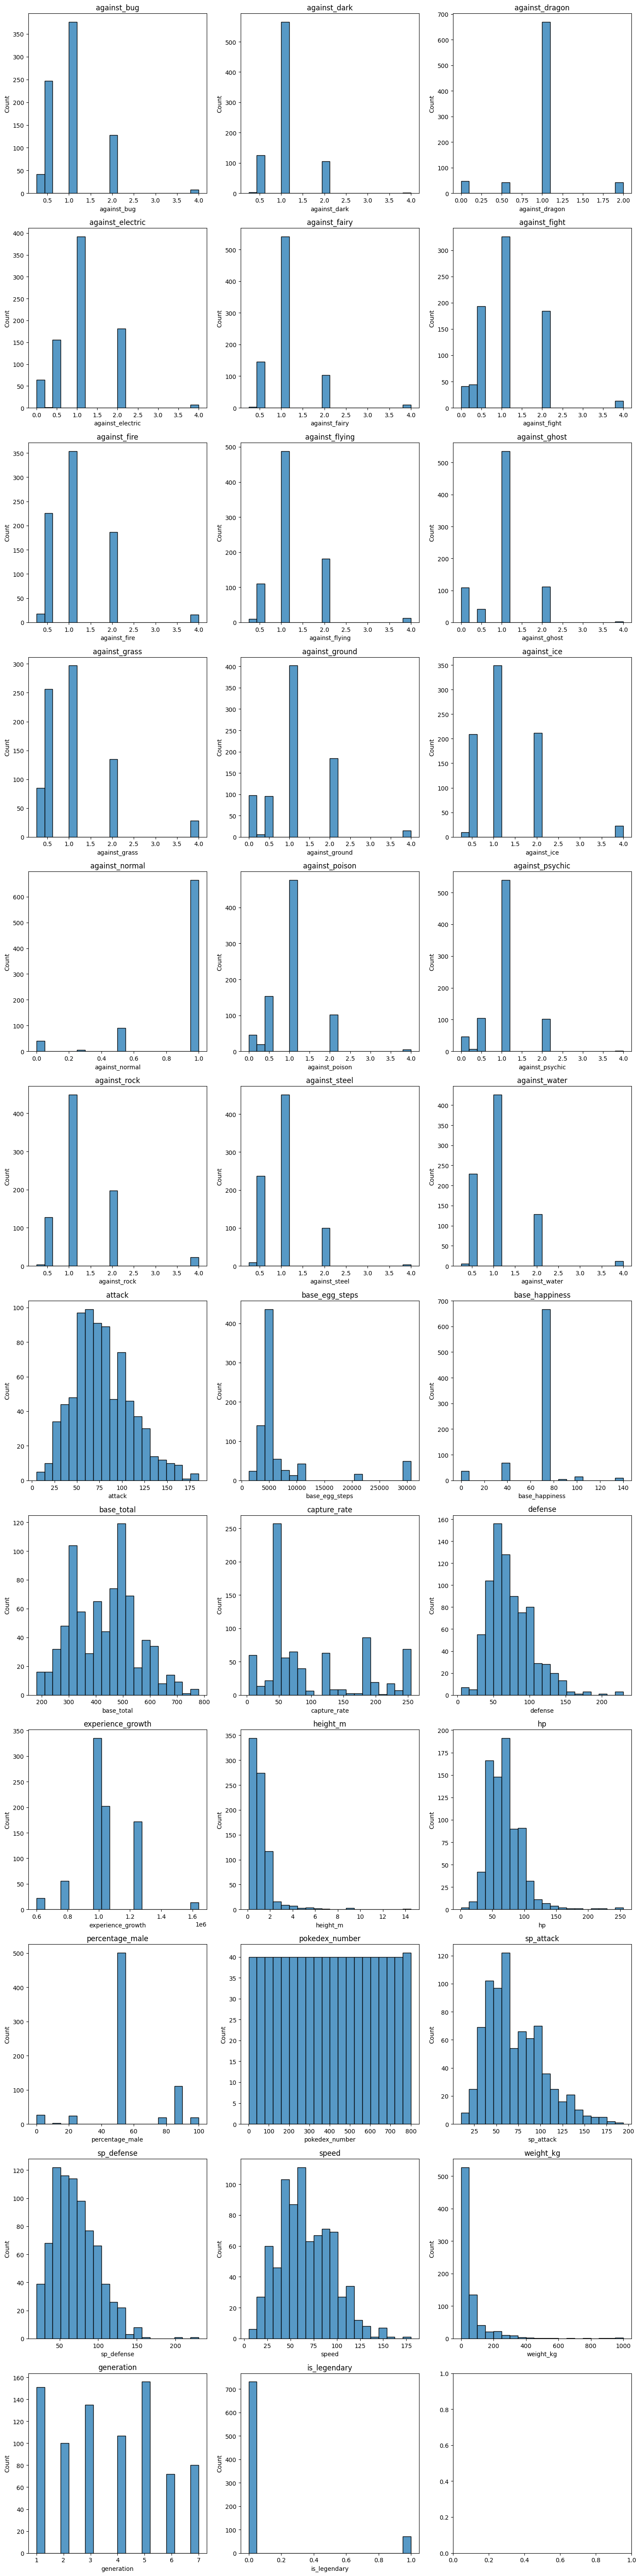

In [147]:
# Explorar las variables numéricas
if num_cols.any():
    num_col = 3
    num_row = -(-len(num_cols) // num_col)  # ceil division
    fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(15, 5*num_row))

    for i, col in enumerate(num_cols):
        row = i // num_col
        sns.histplot(data[col], ax=axs[row, i % num_col], bins=20)
        axs[row, i % num_col].set(title=col)

    plt.tight_layout()
    plt.savefig('histograms.png', dpi=300)
    plt.show()
else:
    print("No hay variables numéricas en los datos.")

In [148]:
# Explorar las variables categóricas
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
print(categorical_columns)

for col in categorical_columns:
    print(f"Classes in {col}:")
    print(data[col].value_counts())
    print('\n')

['abilities', 'classfication', 'japanese_name', 'name', 'type1', 'type2']
Classes in abilities:
['Levitate']                                     29
['Beast Boost']                                   7
['Shed Skin']                                     5
['Justified']                                     4
['Poison Point', 'Rivalry', 'Hustle']             4
                                                 ..
['Swift Swim', 'Oblivious', 'Adaptability']       1
['Shed Skin', 'Infiltrator']                      1
['Immunity', 'Toxic Boost']                       1
['Hyper Cutter', 'Arena Trap', 'Sheer Force']     1
['Soul-Heart']                                    1
Name: abilities, Length: 482, dtype: int64


Classes in classfication:
Dragon Pokémon        8
Mouse Pokémon         6
Mushroom Pokémon      6
Flame Pokémon         5
Balloon Pokémon       5
                     ..
Marionette Pokémon    1
Puppet Pokémon        1
Color Swap Pokémon    1
Weather Pokémon       1
Artificial Pokémon   

In [149]:
# Separar las variables numéricas y categóricas
num_data = data[num_cols]
num_data = num_data.drop(target, axis=1)
cat_data = data[cat_cols]

# Verificar si hay valores faltantes
missing_values_count = num_data.isnull().sum()
non_zero_missing_num = missing_values_count[missing_values_count != 0]
print("Variables numéricas con missing values:", non_zero_missing_num)

missing_values_count = cat_data.isnull().sum()
non_zero_missing_cat = missing_values_count[missing_values_count != 0]
print("Variables categóricas con missing values:", non_zero_missing_cat)

# Imputamos los valores faltantes con la media para las variables numéricas
imputer = SimpleImputer(strategy='mean')
num_data2 = imputer.fit_transform(num_data)
num_data2 = pd.DataFrame(num_data2, columns=num_data.columns)

missing_values_count = num_data2.isnull().sum()
non_zero_missing_num2 = missing_values_count[missing_values_count != 0]
print("Variables categóricas con missing values post imputer:", non_zero_missing_num2)

Variables numéricas con missing values: height_m           20
percentage_male    98
weight_kg          20
dtype: int64
Variables categóricas con missing values: type2    384
dtype: int64
Variables categóricas con missing values post imputer: Series([], dtype: int64)


In [150]:
# Escalar datos
scaler = StandardScaler()
num_data2 = scaler.fit_transform(num_data2)
num_data2 = pd.DataFrame(num_data2, columns=num_data.columns)

# Revisar las estadísticas básicas del dataframe
print(num_data2.describe())

       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000  8.010000e+02    8.010000e+02      8.010000e+02   
mean      0.000000 -1.546828e-16   -1.441488e-16      4.435348e-18   
std       1.000625  1.000625e+00    1.000625e+00      1.000625e+00   
min      -1.250270 -1.843286e+00   -2.745712e+00     -1.640770e+00   
25%      -0.831422 -1.304414e-01    8.845721e-02     -8.768890e-01   
50%       0.006275 -1.304414e-01    8.845721e-02     -1.130085e-01   
75%       0.006275 -1.304414e-01    8.845721e-02     -1.130085e-01   
max       5.032456  6.720938e+00    2.922626e+00      4.470274e+00   

       against_fairy  against_fight  against_fire  against_flying  \
count   8.010000e+02   8.010000e+02  8.010000e+02    8.010000e+02   
mean    2.661209e-17  -6.431254e-17 -2.661209e-17    1.419311e-16   
std     1.000625e+00   1.000625e+00  1.000625e+00    1.000625e+00   
min    -1.569399e+00  -1.486522e+00 -1.280632e+00   -1.560781e+00   
25%    -1.321788e-01  -7

In [151]:
# Onehotencoder
ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(cat_data)
encoded_data_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(cat_data.columns))
print(encoded_data_df.shape)

# Data final
processed_data = pd.concat([data[target], num_data2, encoded_data_df], axis=1)

print(processed_data.shape)

(801, 2709)
(801, 2744)


In [152]:
# Guardar los datos procesados en un archivo CSV
processed_data.to_csv('Pokemon_processed.csv', index=False)

Número de componentes necesarias para explicar el 80% de la varianza: 20


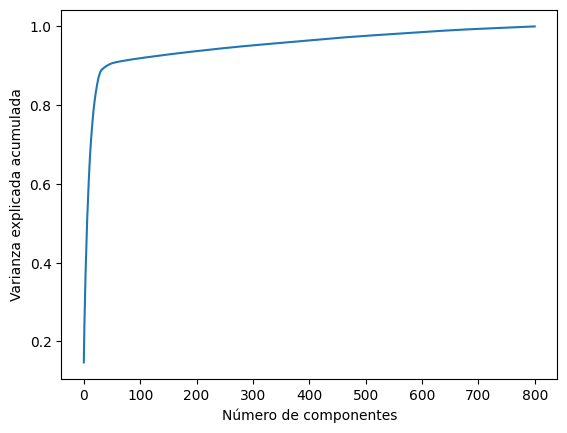

(801, 20)
(801, 2743)


In [210]:
X = processed_data.drop(target, axis=1)
y = processed_data[target]

from sklearn.decomposition import PCA
# Reducir la dimensionalidad con PCA para visualización
pca = PCA()
pca.fit_transform(X)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_sum >= 0.8) + 1
print("Número de componentes necesarias para explicar el 80% de la varianza:", n_components)

# Gráficar la variación acumulada
plt.plot(cumulative_sum)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

# Aplicación de PCA explicando 80% de la varianza
pca = PCA(n_components=0.8, random_state=123)
pca_transformed = pca.fit_transform(X)
print(pca_transformed.shape)
print(X.shape)

pca_transformed_export = pd.concat([pd.Series(y), pd.DataFrame(pca_transformed)], axis=1)
pca_transformed_export.to_csv('pca_data_export.csv', index=False)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [211]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def evaluar(y_test, y_train, y_pred, y_pred_is):

    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, y_pred))

    cm = confusion_matrix(y_train, y_pred_is)
    print("Matriz de confusion - train data")
    print(cm)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de confusion - test data')
    plt.show()

In [212]:
# Separar características (X) y features (y)
# Dados los resultados del PCA, decidi usar los 20 features que explican 80% de la variabilidad y no los 2743 features en el dataset
X = pca_transformed_export.drop(target, axis=1)
y = pca_transformed_export[target]

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.968944099378882
Precision: 0.9333333333333333
Recall: 0.7777777777777778
F1: 0.8484848484848485
AUC-ROC: 0.8853923853923854
Matriz de confusion - train data
[[585   3]
 [  4  48]]


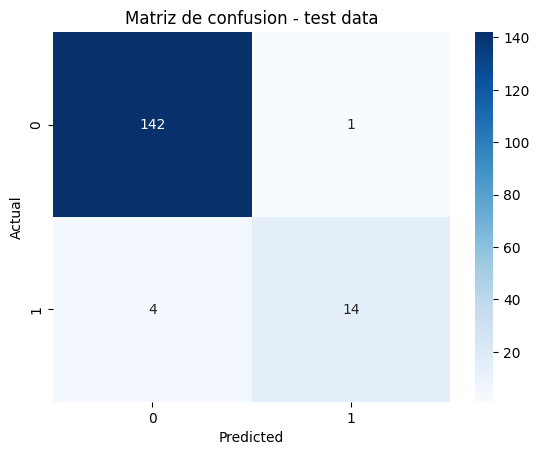

In [213]:
# Regresión logística
logreg = LogisticRegressionCV(cv=10, max_iter=1000, random_state=123)
logreg.fit(X_train, y_train)
y_pred_is = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

Accuracy: 0.9751552795031055
Precision: 0.85
Recall: 0.9444444444444444
F1: 0.8947368421052632
AUC-ROC: 0.9617327117327118
Matriz de confusion - train data
[[578  10]
 [  0  52]]


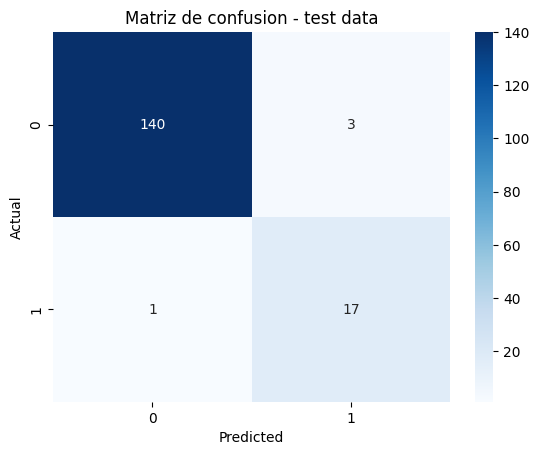

In [214]:
# Regresión logística con clases balanceadas
logreg = LogisticRegressionCV(cv=10, class_weight='balanced', max_iter=1000, random_state=123)
logreg.fit(X_train, y_train)
y_pred_is = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

Accuracy: 0.968944099378882
Precision: 0.9333333333333333
Recall: 0.7777777777777778
F1: 0.8484848484848485
AUC-ROC: 0.8853923853923854
Matriz de confusion - train data
[[588   0]
 [  0  52]]


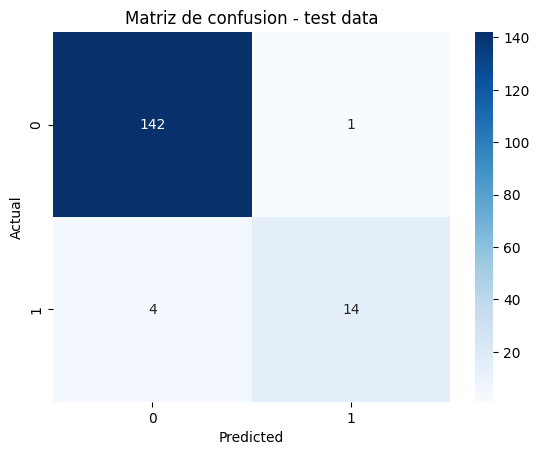

In [215]:
# Arbol de decisión
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_is = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7777777777777778
F1: 0.8750000000000001
AUC-ROC: 0.8888888888888888
Matriz de confusion - train data
[[588   0]
 [  0  52]]


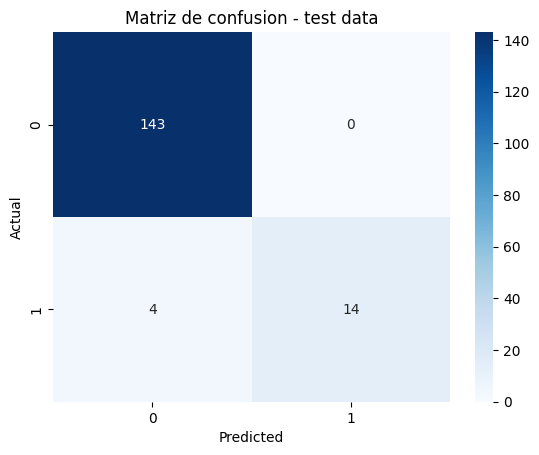

In [216]:
# Random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_is = rfc.predict(X_train)
y_pred = rfc.predict(X_test)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)

Accuracy: 0.9627329192546584
Precision: 0.9285714285714286
Recall: 0.7222222222222222
F1: 0.8125000000000001
AUC-ROC: 0.8576146076146076
Matriz de confusion - train data
[[585   3]
 [  6  46]]


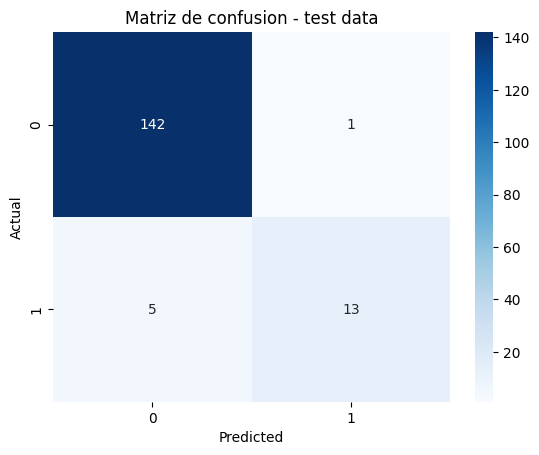

In [217]:
# SGDClassifier
clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.005)
clf.fit(X_train, y_train)
y_pred_is = clf.predict(X_train)
y_pred = clf.predict(X_test)

# Métricas de evaluación
evaluar(y_test, y_train, y_pred, y_pred_is)